In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Getting the Stocks

sp500 = yf.Ticker("^GSPC")

# Getting the History

sp500 = sp500.history(period="max")

# Setting the Index

sp500.index = sp500.index.strftime('%Y-%m-%d')

In [2]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-17,6052.549805,6057.680176,6035.189941,6050.609863,4544500000,0.0,0.0
2024-12-18,6047.649902,6070.669922,5867.790039,5872.160156,5246960000,0.0,0.0
2024-12-19,5912.709961,5935.520020,5866.069824,5867.080078,4896880000,0.0,0.0


<Axes: xlabel='Date'>

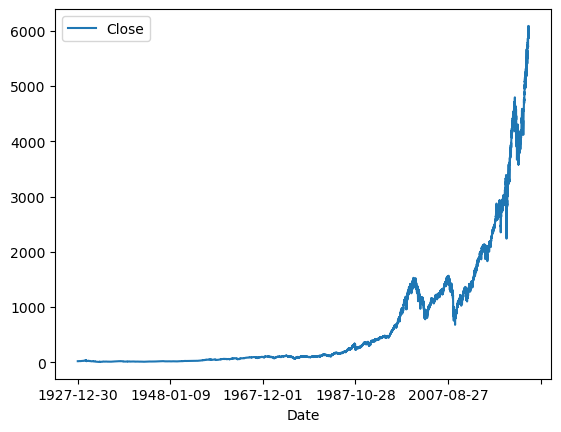

In [3]:
sp500.plot.line(y="Close", use_index = True)

In [4]:
# Cleaning the Data

del sp500["Dividends"]
del sp500["Stock Splits"]

In [5]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2024-12-17,6052.549805,6057.680176,6035.189941,6050.609863,4544500000
2024-12-18,6047.649902,6070.669922,5867.790039,5872.160156,5246960000
2024-12-19,5912.709961,5935.520020,5866.069824,5867.080078,4896880000


In [6]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-12-17,6052.549805,6057.680176,6035.189941,6050.609863,4544500000,5872.160156
2024-12-18,6047.649902,6070.669922,5867.790039,5872.160156,5246960000,5867.080078
2024-12-19,5912.709961,5935.520020,5866.069824,5867.080078,4896880000,5930.850098


In [7]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [8]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-12-17,6052.549805,6057.680176,6035.189941,6050.609863,4544500000,5872.160156,0
2024-12-18,6047.649902,6070.669922,5867.790039,5872.160156,5246960000,5867.080078,0
2024-12-19,5912.709961,5935.520020,5866.069824,5867.080078,4896880000,5930.850098,1


In [9]:
sp500 = sp500.loc["1990-01-01":].copy()

In [10]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-12-17,6052.549805,6057.680176,6035.189941,6050.609863,4544500000,5872.160156,0
2024-12-18,6047.649902,6070.669922,5867.790039,5872.160156,5246960000,5867.080078,0
2024-12-19,5912.709961,5935.520020,5866.069824,5867.080078,4896880000,5930.850098,1


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Used 1000 and 200 for normal, 100 100 for runtime 
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# Training Set

train = sp500.iloc[:-100]

# Testing Set

test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [12]:
from sklearn.metrics import precision_score

predictions = model.predict(test[predictors])
predictions = pd.Series(predictions, index=test.index)

In [13]:
predictions

Date
2024-08-02    1
2024-08-05    1
2024-08-06    1
2024-08-07    1
2024-08-08    1
             ..
2024-12-17    0
2024-12-18    0
2024-12-19    0
2024-12-20    0
2024-12-23    0
Length: 100, dtype: int32

In [14]:
precision_score(test["Target"], predictions)

0.75

In [15]:
combined = pd.concat([test["Target"], predictions], axis=1)

<Axes: xlabel='Date'>

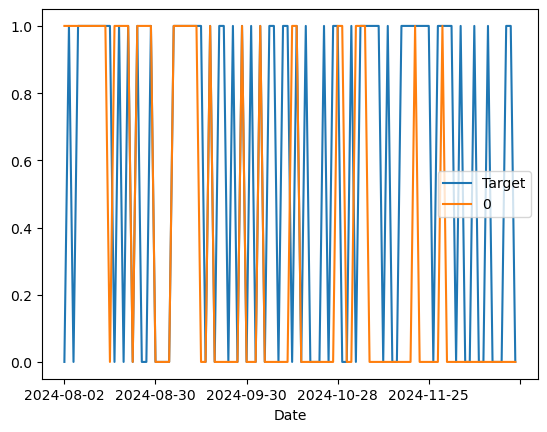

In [16]:
combined.plot()

In [17]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    predictions = model.predict(test[predictors])
    predictions = pd.Series(predictions, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], predictions], axis=1)
    return combined

In [18]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range (start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [19]:
predictions = backtest(sp500, model, predictors)

In [20]:
predictions["Predictions"].value_counts()

Predictions
0    3684
1    2628
Name: count, dtype: int64

In [21]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5289193302891934

In [22]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.536122
0    0.463878
Name: count, dtype: float64

In [23]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [24]:
sp500 = sp500.dropna()

In [25]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-16,6063.790039,6085.189941,6059.140137,6074.080078,4391100000,6050.609863,0,1.001896,1.0,1.002472,2.0,1.032601,36.0,1.127786,146.0,1.348720,532.0
2024-12-17,6052.549805,6057.680176,6035.189941,6050.609863,4544500000,5872.160156,0,0.998064,1.0,0.998081,2.0,1.027644,35.0,1.122359,145.0,1.342808,531.0
2024-12-18,6047.649902,6070.669922,5867.790039,5872.160156,5246960000,5867.080078,0,0.985033,0.0,0.975468,1.0,0.996943,34.0,1.088310,145.0,1.302587,530.0


In [26]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [27]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    predictions = model.predict_proba(test[predictors])[:,1]
    predictions[predictions >= 0.6] = 1 # Model has to be more confident to show that the price will go up
    predictions[predictions < 0.6] = 0
    predictions = pd.Series(predictions, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], predictions], axis=1)
    return combined

In [28]:
predictions = backtest(sp500, model, new_predictors)

In [29]:
predictions["Predictions"].value_counts()

Predictions
0.0    4459
1.0     852
Name: count, dtype: int64

In [30]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5751173708920188

In [31]:
predictions

,Target,Predictions
Date,,
2003-11-14,0,0.0
2003-11-17,0,1.0
2003-11-18,1,1.0
2003-11-19,0,0.0
2003-11-20,1,1.0
...,...,...
2024-12-16,0,0.0
2024-12-17,0,0.0
2024-12-18,0,1.0


In [32]:
# Neural network, linear regression, and then compare, and then add more predictors later if can
# Continuing to extend
# adding news? increasing resolution? looking at indexes around the world that open before sp500 and how it might affect it?

In [84]:
# Implementing Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

new_train = sp500.iloc[:-100].copy()
new_test = sp500.iloc[-100:].copy()

new_train_scaled = scaler.fit_transform(new_train[new_predictors])
new_test_scaled = scaler.transform(new_test[new_predictors])

new_model = LinearRegression()

new_model.fit(new_train_scaled, new_train["Target"])
print(new_train)
print(new_train_scaled)
print(new_test)
print(new_test_scaled)

                   Open         High          Low        Close      Volume  \
Date                                                                         
1993-12-14   465.730011   466.119995   462.459991   463.059998   275050000   
1993-12-15   463.059998   463.690002   461.839996   461.839996   331770000   
1993-12-16   461.859985   463.980011   461.859985   463.339996   284620000   
1993-12-17   463.339996   466.380005   463.339996   466.380005   363750000   
1993-12-20   466.380005   466.899994   465.529999   465.850006   255900000   
...                 ...          ...          ...          ...         ...   
2024-07-25  5428.700195  5491.589844  5390.950195  5399.220215  4592120000   
2024-07-26  5433.669922  5488.319824  5430.700195  5459.100098  3638770000   
2024-07-29  5476.549805  5487.740234  5444.439941  5463.540039  3379970000   
2024-07-30  5478.729980  5489.459961  5401.700195  5436.439941  3777740000   
2024-07-31  5505.589844  5551.509766  5493.750000  5522.299805  

In [85]:
new_predictions = new_model.predict(new_test_scaled)
new_test["Predictions"] = new_predictions
new_test["Predictions"]

Date
2024-08-01    0.576173
2024-08-02    0.601999
2024-08-05    0.621597
2024-08-06    0.541476
2024-08-07    0.585178
                ...   
2024-12-16    0.562087
2024-12-17    0.571030
2024-12-18    0.628264
2024-12-19    0.581482
2024-12-20    0.545486
Name: Predictions, Length: 100, dtype: float64

In [86]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(new_test["Target"], new_test["Predictions"])
r2 = r2_score(new_test["Target"], new_test["Predictions"])

print (f"Mean Squared Error: {mse}")
print (f"R-Squared: {r2}")

Mean Squared Error: 0.2442596129493112
R-Squared: -0.009754497516788918


In [90]:
threshold = 0.6
new_test["Binary_Predictions"] = (new_test["Predictions"] >= threshold).astype(int)


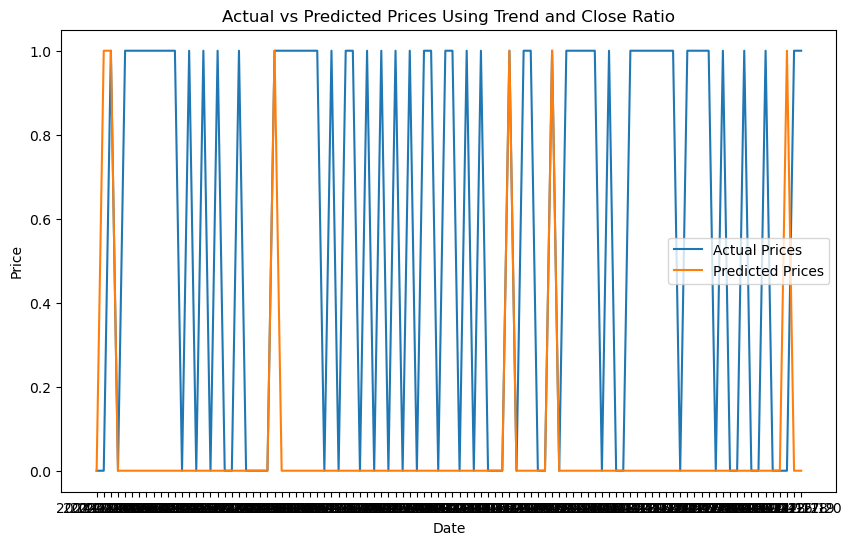

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(new_test.index, new_test["Target"], label="Actual Prices")
plt.plot(new_test.index, new_test["Binary_Predictions"], label="Predicted Prices")
plt.legend()
plt.title("Actual vs Predicted Prices Using Trend and Close Ratio")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# Need to standardize the data somehow, because it is not accurate at all for some reason, maybe it just sucks?

In [ ]:
# Implementing the Neural Network